# COMP 4151 - Project Report 1


## Group member: Jie Ni, Michael Porter, Bennett Poorman

**Note**: 

- All work in this assignment must be done, created, originated from each student. 
- All external assistance must be explicitly mentioned and cited. 
- Using work done by others without explicit citation is considered cheating. 
- A student will receive a zero grade on the assignment for cheating. 
- Repeated offence will lead to additional consequences.

This assignment focuses on the first phase of the project.  The dataset can be obtained here: https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv

Give comprehensive answers to these questions, as much as, possible.  When you answer a question, your answer should be in English. At the same time, if applicable, the answer should consist Python code that shows how you obtain your answer.  People should be able to read and understand your answer without guessing on your behalf how to get the answer.

1. What is the Indicator attribute?
2. How many categories of Indicator are there?
3. Explain the "Value" value of row 26382 in this dataset.
4. Explain the "Value" value of row 7833.
5. Explain the "Value" value of row 10682.  What does it mean that the "Sex" value is "Both"?
6. Explain the "Value" value of row 26701.
7. Specifically, which factors does the indicator category 'Social and Economic Factors' consist of?
8. Visualize (e.g. with seaborn) the suicide rate of some specific race in the 3 most populous and 3 least populous cities over the period of the seven years.  Explain in English each step, and show your Python code of each step.


Assume **data** = **pandas.read_csv("https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv")**


### 1. What is the Indicator attribute?

+ The indicator attribute specifies what attribute of the population is being measured for a given data point.

### 2. How many categories of Indicator are there?


> Flowing python codes return the value of 'Indicator Category' and 'Indicator' columns respectively.

```python

data['Indicator Category']

data['Indicator']

```

> Using the below python codes, we can find that there are 13 unique 'Indicator Category' and 61 unique 'Indicator' and, from this information, we also know that a particular one or more 'Indicator' fall (can be described) in  'Indicator Category'.

```python
data['Indicator Category'].nunique() # output -> 13
data['Indicator'].nunique() # output -> 61
```


### 3. Explain the "Value" value of row 26382 in this dataset.


```python
data.iloc[[26382]] # returns the 26382th record as a dataframe
# As explained in the "BCHC Requested Methodology" column, the value represents the rate of death of infant per 1000 live births.

data.iloc[[26382],5]
# Taking in consideration of columns 'Year', 'Race/Ethnicity', 'Value', 'Place', 'BCHC Requested Methodology', this particular record convey the message: the rate of death for infant at birth is about 2 per 1000 (2/1000) for Asian population in 2010, Denver, CO.
```

### 4. Explain the "Value" value of row 7833.

```python
data.iloc[[7833]] # returns the 7833th record as a dataframe
# As explained in the "BCHC Requested Methodology" column, the value represents the percentage of adults who meets "CDC-Recommended Physical Activity Levels".

data.iloc[[7833],5]
# Taking in consideration of columns 'Year', 'Race/Ethnicity', 'Value', 'Place', 'BCHC Requested Methodology', this particular record convey the message: the percentage of physical activity for Hispanic adult population of 2011, in Oakland (Alameda County), CA, is about 44.2%.
```

### 5. Explain the "Value" value of row 10682. What does it mean that the "Sex" value is "Both"?

```python
data.iloc[[10682]] # returns the 10682th recird as a dataframe
# As explained in the "BCHC Requested Methodology" column, the value represents the percentage of population with a disability "(including hearing, vision, cognitive, ambulatory, self-care, or independent living difficulties")"

data.iloc[[10682],5]
# Taking in considering of columns 'Year', 'Race/Ethnicity', 'Value', 'Place', 'BCHC Requested Methodology', this particular record convey the message: In 2016, the percentage Hispanic population, in Los Angeles, CA, is about 8.9%.
```

> The value of "Both" in the "Sex" column means that both gender (Male and Female) are taking into account.

### 6. Explain the "Value" value of row 26701.

```python
data.iloc[[26701]] # returns the 26701th recird as a dataframe
# This is same as the answer from question #3.

data.iloc[[26701],5]
# Taking in considering of columns 'Year', 'Race/Ethnicity', 'Value', 'Place', 'BCHC Requested Methodology', this particular record convey the message: the rate of death for infant at birth is about 5 per 1000 (5/1000) for White population in 2012, San Antonio, TX.
```

### 7. Specifically, which factors does the indicator category 'Social and Economic Factors' consist of?

```python
data.loc[data['Indicator Category'] == "Social and Economic Factors", 'Indicator'].unique()

# Below is the output

# [
#        'Median Household Income (Dollars)',
#        'Percent Living Below 200% Poverty Level',
#        'Percent of 3 and 4 Year Olds Currently Enrolled in Preschool',
#        'Percent of Children Living in Poverty',
#        'Percent of High School Graduates (Over Age 18)',
#        'Percent of Households Whose Housing Costs Exceed 35% of Income',
#        'Percent of Population Uninsured', 'Percent Unemployed'
# ]

```

### 8. Visualize (e.g. with seaborn) the suicide rate of some specific race in the 3 most populous and 3 least populous cities over the period of the seven years. Explain in English each step, and show your Python code of each step.

```python
exclude_place = 'U.S. Total, U.S. Total'
population_data = data[(data['Indicator'] == 'Total Population (People)') & (data['Place'] != exclude_place)]

suicide_data = data[(data['Indicator'] == "Suicide Rate (Age-Adjusted; Per 100,000 people)") & (data['Place'] != exclude_place)]

# merge two data (suicide and population) together based on (year, sex, race/ethnicity, and place)
# then sort the value by year and population (both ascending) and get the top 3 value after group it by year.
# this will give us the 3 least populous cities from period [2012 to 2016] 
#(Note that some years were excluded because some data was missing in the "Indicator" column and we match two data frame by year, sex("both"), race/ethnicity, and place)
least_populous_data = pd.merge(population_data,suicide_data, on=['Year','Sex','Race/Ethnicity','Place'], suffixes=("_pop","_suicide")).sort_values(by=['Year','Value_pop'],ascending=[True,True]).groupby("Year").head(3)

# similarily, the data for 3 most populous cities on different time period
most_populous_data = pd.merge(population_data,suicide_data, on=['Year','Sex','Race/Ethnicity','Place'], suffixes=("_pop","_suicide")).sort_values(by=['Year','Value_pop'],ascending=[True,False]).groupby("Year").head(3)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# the order of city population is ascending (from left to right: less populous to more populous)
fig, axes = plt.subplots(5,figsize=(10,10))
j = 0
for year in least_populous_data['Year'].unique():
    sns.barplot(x='Place',y='Value_suicide',data=least_populous_data[least_populous_data['Year']==year],ax=axes[j])
    j += 1
    
# the order of city population is descending (from left to right: more populous to less populous)
fig, axes = plt.subplots(5,figsize=(10,10))
j = 0
for year in most_populous_data['Year'].unique():
    sns.barplot(x='Place',y='Value_suicide',data=most_populous_data[most_populous_data['Year']==year],ax=axes[j])
    j += 1
```


# COMP 4151 - Project Report 2

### Hypothesis testing and model evaluation
> In part two of our project report, we will try different models on the hypothesis that we came up with. We will use regression models to test our hypothesis since our goal is to predict obesity rate (continuous data).

#### Following are three main steps we follow
+ First, each member in the team pose a hypothesis that he think might contribute to obesity rate.
+ Second, we use the regression methods that we learned in class to fit our data
+ Third, we evaluate our model (regressors because the variable of interest is continuous) and show the result.

#### Following are the models that we will be using to fit
+ Decision Tree Regressor
+ Random Forest Regressor
+ Linear Regression
+ Lasso Regression
+ Ridge Regression
+ K nearest neighbor regressor
+ Support Vector Regressor


### Our Hypothesis

+ There exists a positive linear relationship between disability rate and obesity rate. In other word, higher disability rates correlates with higher obesity rates.
+ There exists a linear relationship between smoking and obesity.
+ There exists a linear relationship between income and obesity

# Disability V.S. Obesity (Bennett Poorman)

In [490]:
import pandas as pd
import seaborn as sns

In [491]:
data_src = 'dataset/BCHI-dataset_2019-03-04.csv'
df = pd.read_csv(data_src) \
       .rename(columns={'Race/Ethnicity': 'Race_Ethnicity'})

In [492]:
obese_adult = df.loc[df['Indicator'] == 'Percent of Adults Who Are Obese'] \
                .rename(columns={'Value': 'Obesity_Rate'})

obese_hs = df.loc[df['Indicator'] == 'Percent of High School Students Who Are Obese'] \
             .rename(columns={'Value': 'Obesity_Rate'})

disabled = df.loc[df['Indicator'] == 'Percent of Population with a Disability'] \
             .rename(columns={'Value': 'Disability_Rate'})

In [493]:
obese_adult =  obese_adult[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Obesity_Rate']]
obese_hs = obese_hs[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Obesity_Rate']]
disabled = disabled[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Disability_Rate']]

obese_adult = obese_adult.dropna()
obese_hs = obese_hs.dropna()
disabled = disabled.dropna()

obese_adult['Status'] = 'Adult'
obese_hs['Status'] = 'HS Student'

obese_all = pd.concat([obese_adult, obese_hs])

obese_all = obese_all[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Status', 'Obesity_Rate']]

obese_adult = obese_adult.drop(columns=['Status'])
obese_hs = obese_hs.drop(columns=['Status'])

In [494]:
obese_disabled_adult = obese_adult.merge(disabled)
obese_disabled_adult.sample(3)

,Year,Sex,Race_Ethnicity,Place,Obesity_Rate,Disability_Rate
286,2015,Both,All,"San Francisco, CA",18.4,10.5
322,2015,Both,Other,"San Diego County, CA",24.5,6.8
52,2012,Both,Other,"Detroit, MI",43.2,7.9


In [495]:
obese_disabled_hs = obese_hs.merge(disabled)
obese_disabled_hs.sample(3)

,Year,Sex,Race_Ethnicity,Place,Obesity_Rate,Disability_Rate
135,2015,Both,White,"U.S. Total, U.S. Total",12.4,13.6
68,2013,Female,All,"Boston, MA",12.7,12.2
31,2013,Both,Black,"Los Angeles, CA",13.7,16.0


In [496]:
obese_all.sample(3)

,Year,Sex,Race_Ethnicity,Place,Status,Obesity_Rate
8182,2011,Both,Asian/PI,"Philadelphia, PA",HS Student,8.6
7143,2015,Male,All,"Columbus, OH",Adult,37.6
8224,2011,Male,All,"Boston, MA",HS Student,14.4


In [497]:
disabled.sample(3)

,Year,Sex,Race_Ethnicity,Place,Disability_Rate
10109,2014,Both,Hispanic,"Seattle, WA",7.6
10567,2016,Both,All,"San Diego County, CA",10.1
10741,2016,Both,Other,"U.S. Total, U.S. Total",8.3


In [498]:
obese_disabled_all = obese_all.merge(disabled)
obese_disabled_all.sample(3)

,Year,Sex,Race_Ethnicity,Place,Status,Obesity_Rate,Disability_Rate
386,2015,Both,Black,"Denver, CO",HS Student,12.6,13.2
105,2013,Both,All,"San Francisco, CA",HS Student,7.7,10.6
417,2015,Both,White,"Seattle, WA",Adult,15.7,8.9


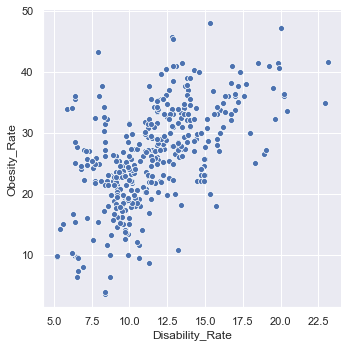

In [499]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=obese_disabled_adult)

In [500]:
obese_disabled_adult[['Obesity_Rate', 'Disability_Rate']].corr()

,Obesity_Rate,Disability_Rate
Obesity_Rate,1.000000,0.578036
Disability_Rate,0.578036,1.000000


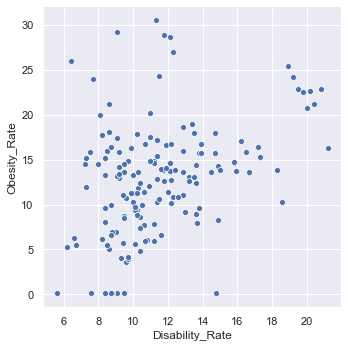

In [501]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=obese_disabled_hs)

In [502]:
obese_disabled_hs[['Obesity_Rate', 'Disability_Rate']].corr()

,Obesity_Rate,Disability_Rate
Obesity_Rate,1.000000,0.376346
Disability_Rate,0.376346,1.000000


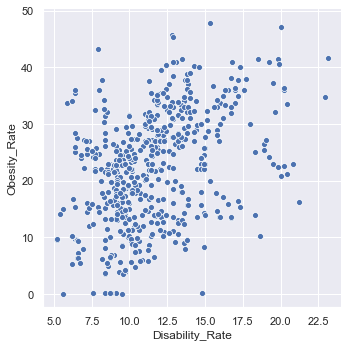

In [503]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', data=obese_disabled_all)

In [504]:
obese_disabled_all[['Obesity_Rate', 'Disability_Rate']].corr()

,Obesity_Rate,Disability_Rate
Obesity_Rate,1.000000,0.405618
Disability_Rate,0.405618,1.000000


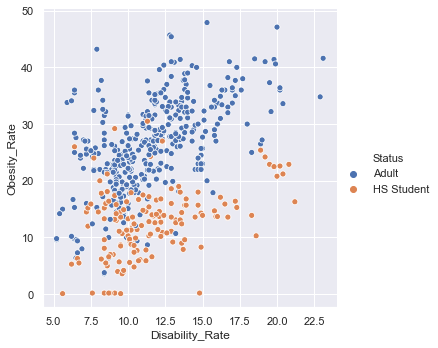

In [505]:
sns.relplot(x='Disability_Rate', y='Obesity_Rate', hue='Status', data=obese_disabled_all)

In [506]:
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

In [507]:
adult_obesity_rate_X = obese_disabled_adult[['Obesity_Rate']]
hs_obesity_rate_X = obese_disabled_hs[['Obesity_Rate']]
all_obesity_rate_X = obese_disabled_all[['Obesity_Rate']]

adult_obesity_rate_y = obese_disabled_adult['Obesity_Rate']
hs_obesity_rate_y = obese_disabled_hs['Obesity_Rate']
all_obesity_rate_y = obese_disabled_all['Obesity_Rate']

adult_disability_rate_X = obese_disabled_adult[['Disability_Rate']]
hs_disability_rate_X = obese_disabled_hs[['Disability_Rate']]
all_disability_rate_X = obese_disabled_all[['Disability_Rate']]

adult_disability_rate_y = obese_disabled_adult['Disability_Rate']
hs_disability_rate_y = obese_disabled_hs['Disability_Rate']
all_disability_rate_y = obese_disabled_all['Disability_Rate']

cv = ShuffleSplit(n_splits=50)

In [508]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svm_lin = SVR(kernel='linear', gamma='auto')
svm_poly = SVR(kernel='poly', degree=2, gamma='auto')

In [509]:
def evaluate(model):
    score = round(cross_validate(model, adult_disability_rate_X, adult_obesity_rate_y, scoring='r2', cv=cv)['test_score'].mean(), 2)
    print('X = Disability Rate, y = Adult Obesity Rate, score = ', score)
    score = round(cross_validate(model, adult_obesity_rate_X, adult_disability_rate_y, scoring='r2', cv=cv)['test_score'].mean(), 2)
    print('X = Adult Obesity Rate, y = Disability Rate, score = ', score)
    score = round(cross_validate(model, hs_disability_rate_X, hs_obesity_rate_y, scoring='r2', cv=cv)['test_score'].mean(), 2)
    print('X = Disability Rate, y = HS Obesity Rate, score = ', score)
    score = round(cross_validate(model, hs_obesity_rate_X, hs_disability_rate_y, scoring='r2', cv=cv)['test_score'].mean(), 2)
    print('X = HS Obesity Rate, y = Disability Rate, score = ', score)
    score = round(cross_validate(model, all_disability_rate_X, all_obesity_rate_y, scoring='r2', cv=cv)['test_score'].mean(), 2)
    print('X = Disability Rate, y = All Obesity Rate, score = ', score)
    score = round(cross_validate(model, all_obesity_rate_X, all_disability_rate_y, scoring='r2', cv=cv)['test_score'].mean(), 2)
    print('X = All Obesity Rate, y = Disability Rate, score = ', score)

In [510]:
print('Decision Tree Regressor Scores:')
evaluate(dtr)

Decision Tree Regressor Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.13
X = Adult Obesity Rate, y = Disability Rate, score =  -0.08
X = Disability Rate, y = HS Obesity Rate, score =  -0.76
X = HS Obesity Rate, y = Disability Rate, score =  -0.75
X = Disability Rate, y = All Obesity Rate, score =  -0.11
X = All Obesity Rate, y = Disability Rate, score =  -0.43


In [511]:
print('Random Forest Regressor Scores:')
evaluate(rfr)

Random Forest Regressor Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.23
X = Adult Obesity Rate, y = Disability Rate, score =  0.07
X = Disability Rate, y = HS Obesity Rate, score =  -0.19
X = HS Obesity Rate, y = Disability Rate, score =  -0.44
X = Disability Rate, y = All Obesity Rate, score =  -0.06
X = All Obesity Rate, y = Disability Rate, score =  -0.11


In [512]:
print('Linear Regression Scores:')
evaluate(lr)

Linear Regression Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.29
X = Adult Obesity Rate, y = Disability Rate, score =  0.31
X = Disability Rate, y = HS Obesity Rate, score =  0.09
X = HS Obesity Rate, y = Disability Rate, score =  0.01
X = Disability Rate, y = All Obesity Rate, score =  0.13
X = All Obesity Rate, y = Disability Rate, score =  0.15


In [513]:
print('Lasso Scores:')
evaluate(lasso)

Lasso Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.29
X = Adult Obesity Rate, y = Disability Rate, score =  0.3
X = Disability Rate, y = HS Obesity Rate, score =  -0.0
X = HS Obesity Rate, y = Disability Rate, score =  -0.01
X = Disability Rate, y = All Obesity Rate, score =  0.15
X = All Obesity Rate, y = Disability Rate, score =  0.15


In [514]:
print('Ridge Scores:')
evaluate(ridge)

Ridge Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.31
X = Adult Obesity Rate, y = Disability Rate, score =  0.29
X = Disability Rate, y = HS Obesity Rate, score =  0.06
X = HS Obesity Rate, y = Disability Rate, score =  -0.04
X = Disability Rate, y = All Obesity Rate, score =  0.12
X = All Obesity Rate, y = Disability Rate, score =  0.13


In [515]:
print('Linear Support Vector Machine Scores:')
evaluate(svm_lin)

Linear Support Vector Machine Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.31
X = Adult Obesity Rate, y = Disability Rate, score =  0.28
X = Disability Rate, y = HS Obesity Rate, score =  0.03
X = HS Obesity Rate, y = Disability Rate, score =  0.03
X = Disability Rate, y = All Obesity Rate, score =  0.13
X = All Obesity Rate, y = Disability Rate, score =  0.11


In [516]:
model = svm_poly

print('Polynomial (Degree 2) Support Vector Machine Scores:')

X_train, X_test, y_train, y_test = train_test_split(adult_disability_rate_X, adult_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Disability Rate, y = Adult Obesity Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(adult_obesity_rate_X, adult_disability_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Adult Obesity Rate, y = Disability Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(hs_disability_rate_X, hs_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Disability Rate, y = HS Obesity Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(hs_obesity_rate_X, hs_disability_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = HS Obesity Rate, y = Disability Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(all_disability_rate_X, all_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Disability Rate, y = All Obesity Rate, score = ', score)

X_train, X_test, y_train, y_test = train_test_split(all_obesity_rate_X, all_disability_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = All Obesity Rate, y = Disability Rate, score = ', score)

Polynomial (Degree 2) Support Vector Machine Scores:
X = Disability Rate, y = Adult Obesity Rate, score =  0.23
X = Adult Obesity Rate, y = Disability Rate, score =  0.37
X = Disability Rate, y = HS Obesity Rate, score =  0.14
X = HS Obesity Rate, y = Disability Rate, score =  -0.07
X = Disability Rate, y = All Obesity Rate, score =  0.05
X = All Obesity Rate, y = Disability Rate, score =  0.16


In [517]:
model = SVR(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(adult_disability_rate_X, adult_obesity_rate_y, test_size=0.33)
model.fit(X_train, y_train)
score = round(model.score(X_test, y_test), 2)
print('X = Disability Rate, y = Adult Obesity Rate, score = ', score)

X = Disability Rate, y = Adult Obesity Rate, score =  0.38


In [518]:
ob_dis = obese_disabled_adult.copy(deep=True)
ob_dis = ob_dis[['Year', 'Sex', 'Race_Ethnicity', 'Place', 'Disability_Rate', 'Obesity_Rate']]
predictions = model.predict(ob_dis[['Disability_Rate']])
ob_dis['Predicted_Obesity_Rate'] = predictions

## Summary of Obesity/Disability Hypothesis

In [519]:
obese_disabled_adult.corr() \
                    .loc[['Obesity_Rate']] \
                    .drop(columns=['Year', 'Obesity_Rate'])

,Disability_Rate
Obesity_Rate,0.578036


In [520]:
obese_disabled_hs.corr() \
                 .loc[['Obesity_Rate']] \
                 .drop(columns=['Year', 'Obesity_Rate'])

,Disability_Rate
Obesity_Rate,0.376346


In [521]:
obese_disabled_all.corr() \
                  .loc[['Obesity_Rate']] \
                  .drop(columns=['Year', 'Obesity_Rate'])

,Disability_Rate
Obesity_Rate,0.405618


In [522]:
evaluate(SVR(kernel='linear'))

X = Disability Rate, y = Adult Obesity Rate, score =  0.28
X = Adult Obesity Rate, y = Disability Rate, score =  0.32
X = Disability Rate, y = HS Obesity Rate, score =  0.04
X = HS Obesity Rate, y = Disability Rate, score =  0.0
X = Disability Rate, y = All Obesity Rate, score =  0.12
X = All Obesity Rate, y = Disability Rate, score =  0.14


**Hypothesis:** Obesity rate shares a direct correlation with disability rate. 

**Testing Method:** Compute the correlation between obesity rates in high-school students and disability rates in the population sample. Compute the correlation between obesity rates in adults and disability rates in the population sample. Compute the correlation between obesity rates in the population sample (both high-school students and adults) and disability rates in the population sample. Finally, test different regression models on these variables.

**Conclusion:**
There is a $58 \%$ correlation between obesity rates in adults and disability rates in the population sample. There is a $38 \%$ correlation between obesity rates in high school students and disability rates in the population sample. There is a $41 \%$ correlation between obesity rates in the population sample (both high-school students and adults) and disability rates in the population sample. <br>
When building the regression models, when the feature is chosen to be the disability rate and the target is chosen to be the adult obesity rate, the $R^2$ score tends to fall in the range from $20 \%$ to $40 \%$.

# Binge Drinking V.S. Obesity (Jie Ni)

In [440]:
# house keeping stuffs, importing necessary methods from sklearn and pandas
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [311]:
import seaborn as sns; sns.set()

In [312]:
from sklearn.model_selection import ShuffleSplit, cross_validate

In [313]:
# loading data
data = pd.read_csv("https://umdrive.memphis.edu/vphan/public/4151/BCHI-dataset_2019-03-04.csv")

In [314]:
# data filtering
high_school_smoke = data[data['Indicator'] == 'Percent of High School Students Who Currently Smoke']
adult_smoke = data[data['Indicator'] == 'Percent of Adults Who Currently Smoke']
high_school_obese = data[data['Indicator'] == 'Percent of High School Students Who Are Obese']
#high_school_obese['high_school/adult'] = "high_school"
adult_obese = data[data['Indicator'] == 'Percent of Adults Who Are Obese']
#adult_obese['high_school/adult'] = "adult"

In [315]:
high_school_smoke.rename(columns={"Value":"smoking_rate"},inplace=True)
high_school_obese.rename(columns={"Value":"obesity_rate"},inplace=True)

adult_smoke.rename(columns={"Value":"smoking_rate"},inplace=True)
adult_obese.rename(columns={"Value":"obesity_rate"},inplace=True)


/home/geekj3t/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Year,smoking_rate,obesity_rate
Year,1.000000,-0.30237,-0.008559
smoking_rate,-0.302370,1.00000,-0.105880
obesity_rate,-0.008559,-0.10588,1.000000


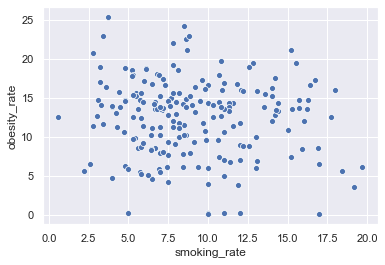

In [536]:
# high school data
high_school_combined = high_school_smoke.merge(high_school_obese,on=["Year","Sex","Race/Ethnicity","Place"])
high_school_combined = high_school_combined.loc[:,['Year','Sex','Race/Ethnicity','Place','smoking_rate','obesity_rate']]
sns.scatterplot(x='smoking_rate',y='obesity_rate',data=high_school_combined)
# correlation matrix for higher school
high_school_combined.corr()

,Year,smoking_rate,obesity_rate
Year,1.000000,0.001464,-0.074200
smoking_rate,0.001464,1.000000,0.429293
obesity_rate,-0.074200,0.429293,1.000000


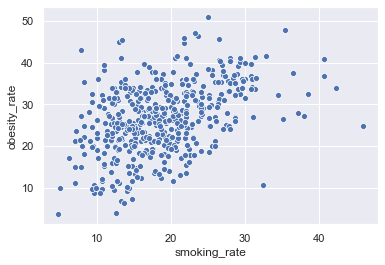

In [537]:
# adult data
adult_combined = adult_smoke.merge(adult_obese,on=["Year","Sex","Race/Ethnicity","Place"])
adult_combined = adult_combined.loc[:,['Year','Sex','Race/Ethnicity','Place','smoking_rate','obesity_rate']]
sns.scatterplot(x='smoking_rate',y='obesity_rate',data=adult_combined)
# correlation matrix for adult
adult_combined.corr()

In [358]:
def model_evaluate(X, y , model, cv):
    score = cross_validate(model,X,y, cv=cv)['test_score']
    return score.mean()
    #print(score.mean())

In [455]:
# this function returns the optimal split to use and the
# corresponding test score of using that number of splits
def return_max_split_score(splits,X,y,model):
    max_split = 2
    max_score = 0
    for nth_split in range(2,splits):
        cv = ShuffleSplit(n_splits=nth_split,test_size=0.3,random_state=5)
        score = model_evaluate(X,y, model,cv)
        if(score > max_score):
            max_split = nth_split
            max_score = score
    return max_split, max_score
    #print(f'max_split={max_split}, max_score={max_score}')

In [535]:
# combin adult and high school data
combined = pd.concat([adult_combined,high_school_combined])
combined.dropna(inplace=True)
# correlation
print(combined.corr())
X = combined[['smoking_rate']]
y = combined['obesity_rate']

                  Year  smoking_rate  obesity_rate
Year          1.000000     -0.123025     -0.125568
smoking_rate -0.123025      1.000000      0.615890
obesity_rate -0.125568      0.615890      1.000000


In [489]:
# store regression models in a key,value pair dictionary
classifiers = {
    'linear_regression': LinearRegression(),
    'ridge_regression': Ridge(random_state=0),
    'lasso_regression': Lasso(random_state=0),
    'KNN_regression': KNeighborsRegressor(n_neighbors=6),
    'decision_tree_regression': DecisionTreeRegressor(random_state=0),
    # uncomment the following line if you want to try 
    # random forest regressor; it was commented out because
    # it took too long to run and the result we got isn't 
    # satifying
    #'random_forest_regression': RandomForestRegressor(random_state=0,n_estimators=100)
    'linear_SVR': SVR(kernel="linear"),
    # same goes here (uncomment to try). 
    # 'poly_SVR': SVR(kernel="poly")
}

# try each classifier and see the performance
for name, classifier in classifiers.items():
    max_split,max_score = return_max_split_score(50,X,y,classifier)
    print(f'classifier name:{name}\nmax_split:{max_split}\nmax_score:{round(max_score,4)}\n')

classifier name:linear_regression
max_split:33
max_score:0.3737

classifier name:ridge_regression
max_split:33
max_score:0.3737

classifier name:lasso_regression
max_split:33
max_score:0.3737

classifier name:KNN_regression
max_split:27
max_score:0.2826

classifier name:decision_tree_regression
max_split:23
max_score:0.096

classifier name:linear_SVR
max_split:33
max_score:0.3714



### As you can see from the above result, there's a tie between linear regression, ridge regression, and lasso regression model

# Income V.S. Obesity (Michael Porter)

In [525]:
import pandas

df = pandas.read_csv("dataset/BCHI-dataset_2019-03-04.csv")

In [526]:
df.loc[df["Indicator"] == "Median Household Income (Dollars)"]

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
31919,Social and Economic Factors,Median Household Income (Dollars),2012,Both,All,23600.0,"Detroit, MI",Median household income (in 2012 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 2622000 was used to isolate data for...,NaN,NaN,NaN,NaN
31920,Social and Economic Factors,Median Household Income (Dollars),2012,Both,All,24257.0,"Cleveland, OH",Median household income (in 2012 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 3916000 was used to isolate data for...,NaN,NaN,NaN,NaN
31921,Social and Economic Factors,Median Household Income (Dollars),2012,Both,All,35386.0,"Philadelphia, PA",Median household income (in 2012 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 4260000 was used to isolate data for...,NaN,NaN,NaN,NaN
31922,Social and Economic Factors,Median Household Income (Dollars),2012,Both,All,39241.0,"Baltimore, MD",Median household income (in 2012 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 2404000 was used to isolate data for...,NaN,NaN,NaN,NaN
31923,Social and Economic Factors,Median Household Income (Dollars),2012,Both,All,41354.0,"Dallas, TX",Median household income (in 2012 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 48113 was used to isolate data for D...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32052,Social and Economic Factors,Median Household Income (Dollars),2016,Both,All,70824.0,"San Diego County, CA",Median household income (in 2016 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 06073 was used to isolate data for S...,NaN,NaN,NaN,NaN
32053,Social and Economic Factors,Median Household Income (Dollars),2016,Both,All,75506.0,"Washington, DC",Median household income (in 2016 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 1150000 was used to isolate data for...,NaN,NaN,NaN,NaN
32054,Social and Economic Factors,Median Household Income (Dollars),2016,Both,All,83476.0,"Seattle, WA",Median household income (in 2016 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 5363000 was used to isolate data for...,NaN,NaN,NaN,NaN
32055,Social and Economic Factors,Median Household Income (Dollars),2016,Both,All,101940.0,"San Jose, CA",Median household income (in 2016 inflation-adj...,"US Census Bureau, American Community Survey 1-...",NaN,FIPS code 0668000 was used to isolate data for...,NaN,NaN,NaN,NaN


In [527]:
df.loc[df["Indicator"] == "Percent of Adults Who Are Obese"]

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
6502,Chronic Disease,Percent of Adults Who Are Obese,2010,Both,All,18.0,"Seattle, WA",BRFSS (or similar survey). Percent of populati...,BRFSS,NaN,NaN,NaN,NaN,14.0,22.0
6503,Chronic Disease,Percent of Adults Who Are Obese,2010,Both,All,20.3,"Boston, MA",BRFSS (or similar survey). Percent of populati...,"Boston Behavioral Risk Factor Survey, Boston P...",NaN,This survey is not conducted annually.,NaN,NaN,18.1,22.5
6504,Chronic Disease,Percent of Adults Who Are Obese,2010,Both,All,26.1,"San Diego County, CA",BRFSS (or similar survey). Percent of populati...,Centers for Disease Control and Prevention (CD...,NaN,NaN,NaN,NaN,NaN,NaN
6505,Chronic Disease,Percent of Adults Who Are Obese,2010,Both,All,26.7,"Charlotte, NC",BRFSS (or similar survey). Percent of populati...,2010 NC BRFSS (Mecklenburg Sample),NaN,NaN,NaN,NaN,21.8,31.6
6506,Chronic Disease,Percent of Adults Who Are Obese,2010,Both,All,29.2,"Baltimore, MD",BRFSS (or similar survey). Percent of populati...,CDC BRFSS,The three most recent years of available data ...,"Due to changes in BRFSS sampling methodology, ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,Chronic Disease,Percent of Adults Who Are Obese,2016,Female,All,NaN,"Oakland (Alameda County), CA",BRFSS (or similar survey). Percent of populati...,California Health Interview Survey (AskCHIS),California Health Interview Survey. Percent of...,Data is for Alameda County; Records where the ...,NaN,NaN,NaN,NaN
7172,Chronic Disease,Percent of Adults Who Are Obese,2016,Male,All,17.8,"Denver, CO",BRFSS (or similar survey). Percent of populati...,Colorado BRFSS,Colorado BRFSS,NaN,NaN,NaN,14.2,21.3
7173,Chronic Disease,Percent of Adults Who Are Obese,2016,Male,All,20.0,"Philadelphia, PA",BRFSS (or similar survey). Percent of populati...,PA Eddie-->BRFSS,NaN,NaN,NaN,NaN,15.0,26.0
7174,Chronic Disease,Percent of Adults Who Are Obese,2016,Male,All,35.2,"Columbus, OH",BRFSS (or similar survey). Percent of populati...,BRFSS,NaN,NaN,NaN,NaN,26.4,44.0


Obesity Hypothesis

I predict that there will be a inverse corellation between median income and obesity rate on a city by city basis

Cities in the south and midwest have a higher than average obesity rate, cities in the northeast and west coast have a lower than average obesity rate

Lower physical activity levels correlate with higher obesity

Higher disability rate correllates with higher obesity rate

/home/geekj3t/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


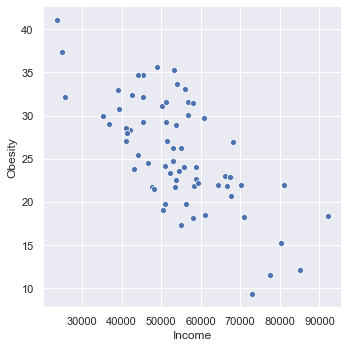

In [528]:
#get income data
incomes = df[df["Indicator"] == "Median Household Income (Dollars)"]
incomes.rename(columns={'Value':'Income'},inplace=True)

# get obesity data    
obesity = df[(df["Indicator"] == "Percent of Adults Who Are Obese") &
            (df["Race/Ethnicity"] == "All") &
            (df["Sex"] == "Both")]
obesity.rename(columns={'Value':'Obesity'},inplace=True)

ob_data = pandas.merge(incomes, obesity, on=["Place", "Year"], how="inner")

# graph the output
import matplotlib.pyplot as plt
import seaborn

seaborn.relplot(x="Income", y="Obesity", data=ob_data)

In [529]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

X = ob_data[["Income"]]
y = ob_data["Obesity"]

model = LinearRegression()
res = cross_validate(model, X, y, cv=10)
print(res["test_score"].mean())

ob_data.corr().head()

0.2530990331556403


,Year,Income,90% Confidence Level - Low_x,90% Confidence Level - High_x,95% Confidence Level - Low_x,95% Confidence Level - High_x,Obesity,90% Confidence Level - Low_y,90% Confidence Level - High_y,95% Confidence Level - Low_y,95% Confidence Level - High_y
Year,1.000000,0.187199,NaN,NaN,NaN,NaN,0.104833,NaN,NaN,-0.093243,0.066988
Income,0.187199,1.000000,NaN,NaN,NaN,NaN,-0.697650,NaN,NaN,-0.794615,-0.612335
90% Confidence Level - Low_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90% Confidence Level - High_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95% Confidence Level - Low_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Hypothesis:** Obesity rate shares an inverse correlation with median income level

**Testing Method:** Using the data set, get the median income each year in each city. Match with the obesity rate each year in each city in a new dataframe. Graph the dataframe with seaborn and get the correllation value. Then use the pandas `corr()` function to find correlations in the data.

**Conclusion:** There appears to be a 70% inverse correlation between income level and obesity rate